# Raw and pre-calibrated data

**WARNING** work in progress

**Author:** Dr. Michele Peresano (CEA-Saclay/IRFU/DAp/LEPCHE), 2021

**Recommended datasample(s):** any simtel file (currently tested on Prod5b)

**Data level(s):** R0 and/or R1

**Description:**

This notebook provides benchmarks for R0 and R1 data levels, meaning waveforms and pre-calibrated, gain-selected waveforms respectively.
It also extracts distributions for quantities used in the pre-calibration process, e.g. digital counts to photoelectron factor and pedestals.

All benchmarks are shown per-gain-channel.

**Requirements and steps to reproduce:**

This notebook requires **ctapipe > 0.11.0 (at the time of writing this means the master branch)**.

`papermill benchmarks-TRAINING-calibration.ipynb results_benchmarks-TRAINING-calibration.ipynb`

adding `-p parameter value` to override any of the available parameters, which can be listed with `--help-notebook`.

**Development and testing:**  

As with any other part of _protopipe_ and being part of the official repository, this notebook can be further developed by any interested contributor.  
The execution of this notebook is not currently automatic, it must be done locally by the user _before_ pushing a pull-request.
Please, strip the output before pushing.

## Table of contents

- [DC to PHE](#DC-to-PHE)
- [Pedestals](#Pedestals)
- [Noise](#Noise)

## Imports
[back to top](#Table-of-contents)

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from ctapipe.instrument import SubarrayDescription
from ctapipe.io import EventSource
try:
    from ctapipe.io import read_table
except ImportError:
    from ctapipe.io.astropy_helpers import h5_table_to_astropy as read_table

## Functions
[back to top](#Table-of-contents)

In [2]:
def add_stats(data, ax, x=0.70, y=0.85, fontsize=10):
    """Add a textbox containing statistical information."""
    n_counts = len(data)
    mu = data.mean()
    median = np.median(data)
    sigma = data.std()
    textstr = '\n'.join((
        
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(x, y,
            textstr,
            transform=ax.transAxes,
            fontsize=fontsize,
            horizontalalignment='left',
            verticalalignment='center',
            bbox=props)

In [3]:
def load_tel_id(file_name = None, tel_id = None):
    """Load R0 and R1 waveforms for 1 telescope."""
    
    if file_name is None:
        raise ValueError("input information is undefined")
    else:
        r0_waveforms = read_table(file_name, f"/r0/event/telescope/tel_{tel_id:03d}")
        r1_waveforms = read_table(file_name, f"/r1/event/telescope/tel_{tel_id:03d}")
        return r0_waveforms, r1_waveforms

## Input data
[back to top](#Table-of-contents)

In [4]:
# simtel file
input_directory_simtel = Path("/Users/michele/Applications/ctasoft/dirac/shared_folder/productions/Prod5b/NSB1x/CTAN/az180/zd20")
input_file_name_simtel = "gamma_20deg_180deg_run100___cta-prod5b-lapalma_desert-2158m-LaPalma-dark.simtel.zst"
# HDF5 file produced with ctapipe-process
input_directory_h5 = "/Users/michele/Applications/ctasoft/dirac/shared_folder/analyses/v0.5.0a1_Prod5b_LaPalma_zd20_az180_NSB1x_point_source/data/DL1a/LocalPeakWindowSum"
input_file_name_h5 = "1stPass.dl1.h5"
# other
max_events = 1 # number of showers to use
allowed_telescopes = None # number of telescopes to condider (default: all telescopes)
use_seaborn = True # see benchmarks.yaml
output_directory = Path.cwd() # default: current working directory

In [5]:
if input_directory_simtel:
    input_directory_simtel = Path(input_directory_simtel)
input_file_simtel = input_directory_simtel / input_file_name_simtel

if input_directory_h5:
    input_directory_h5 = Path(input_directory_h5)
input_file_h5 = input_directory_h5 / input_file_name_h5

In [6]:
# First we check if a _plots_ folder exists already.  
# If not, we create it.
plots_folder = Path(output_directory) / "plots"
plots_folder.mkdir(parents=True, exist_ok=True)

In [7]:
# Plot aesthetics settings
if use_seaborn:
    import seaborn as sns
    
    seaborn_settings = {"style": "whitegrid",
                        "context": "talk",
                        "rc": {"xtick.bottom": True,
                               "ytick.left": True}
                       }

    sns.set_style(seaborn_settings["style"], seaborn_settings["rc"])
    sns.set_context(seaborn_settings["context"])

# read from config file?
single_plot_height = 6
single_plot_width = 8
double_plot_height = 8
double_plot_width = 16

In [8]:
source = EventSource(str(input_file_simtel), max_events=max_events)

for event in source:
    pass

In [49]:
r0_table, r1_table = load_tel_id(file_name = input_file_h5, tel_id = tel_id)

In [17]:
subarray = SubarrayDescription.from_hdf(input_file_h5)
tel_types = {str(tel): tel.camera.geometry for tel in subarray.telescope_types}.keys()
tel_ids_per_tel_type = {tel_type : subarray.get_tel_ids_for_type(tel_type) for tel_type in tel_types}

## DC to PHE
[back to top](#Table-of-contents)

Only the first telescope for each telescope type is considered.

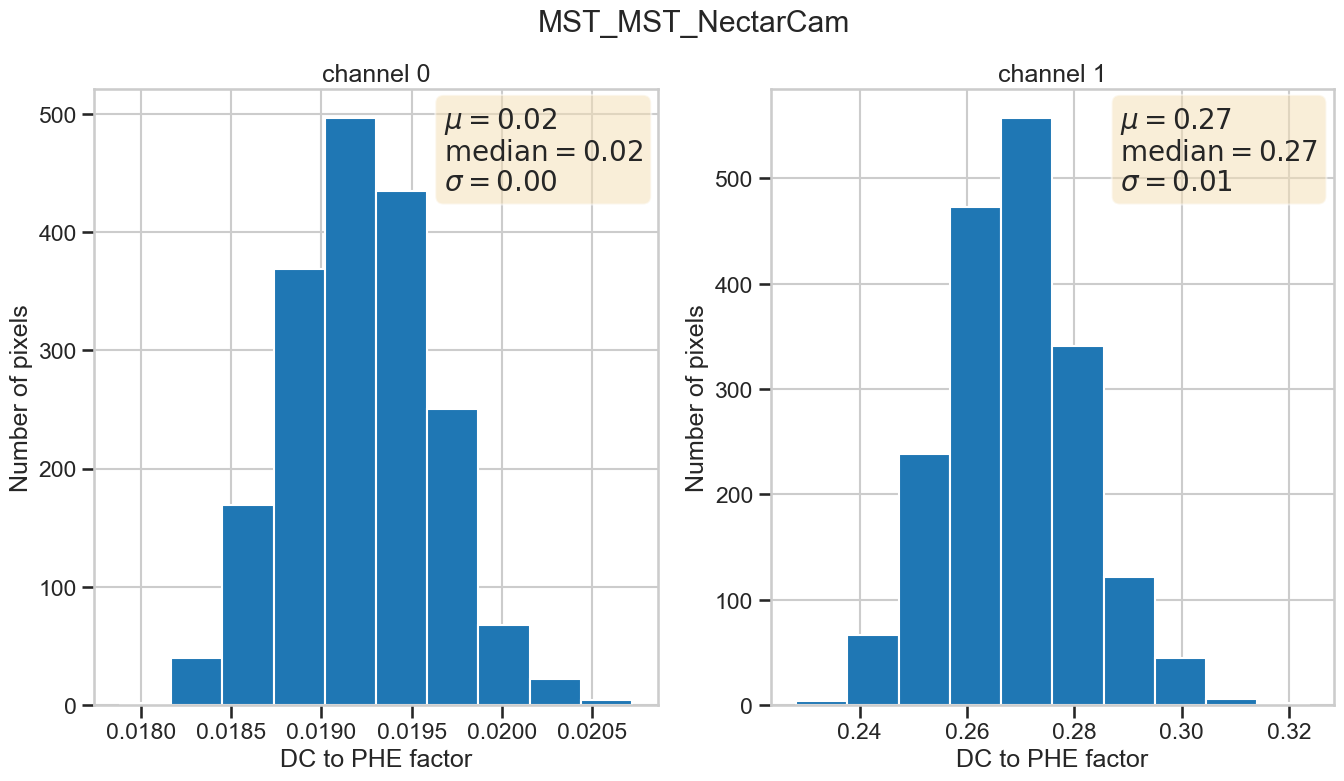

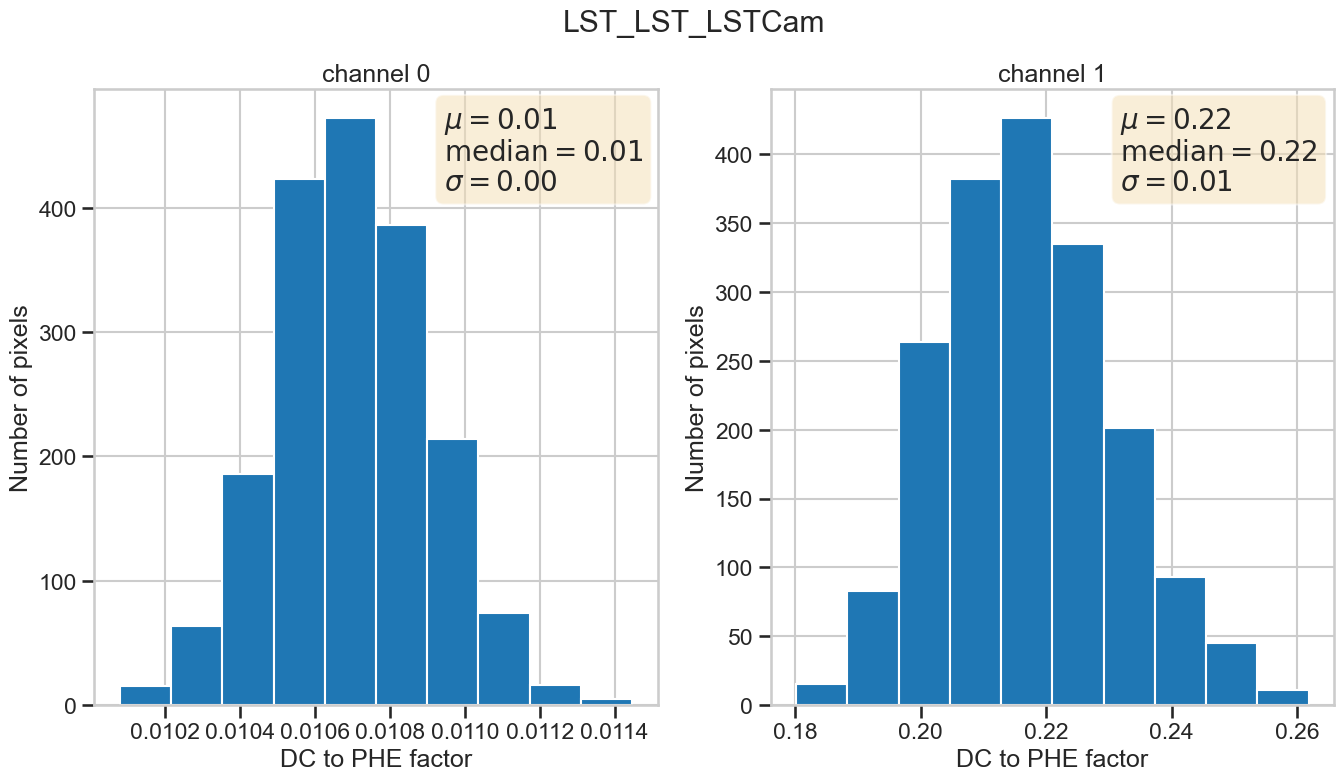

In [26]:
for tel_type in tel_types:
    
    plt.figure(figsize = (double_plot_width, double_plot_height))
    plt.suptitle(tel_type)
    
    tel_id = tel_ids_per_tel_type[tel_type][0] # consider only the first telescope
    dc_to_pe = source.file_.laser_calibrations[tel_id]["calib"]

    for channel, dc_to_pe_per_channel in enumerate(dc_to_pe):
        plt.subplot(1,2,channel+1)
        plt.hist(dc_to_pe_per_channel)
        plt.title(f"channel {channel}")
        plt.xlabel("DC to PHE factor")
        plt.ylabel("Number of pixels")
        plt.grid(visible=True)
        add_stats(dc_to_pe_per_channel, plt.gca(), x=0.62, y=0.90, fontsize=20)
    
    plt.show()

## Pedestals
[back to top](#Table-of-contents)

15002.045
14997.091


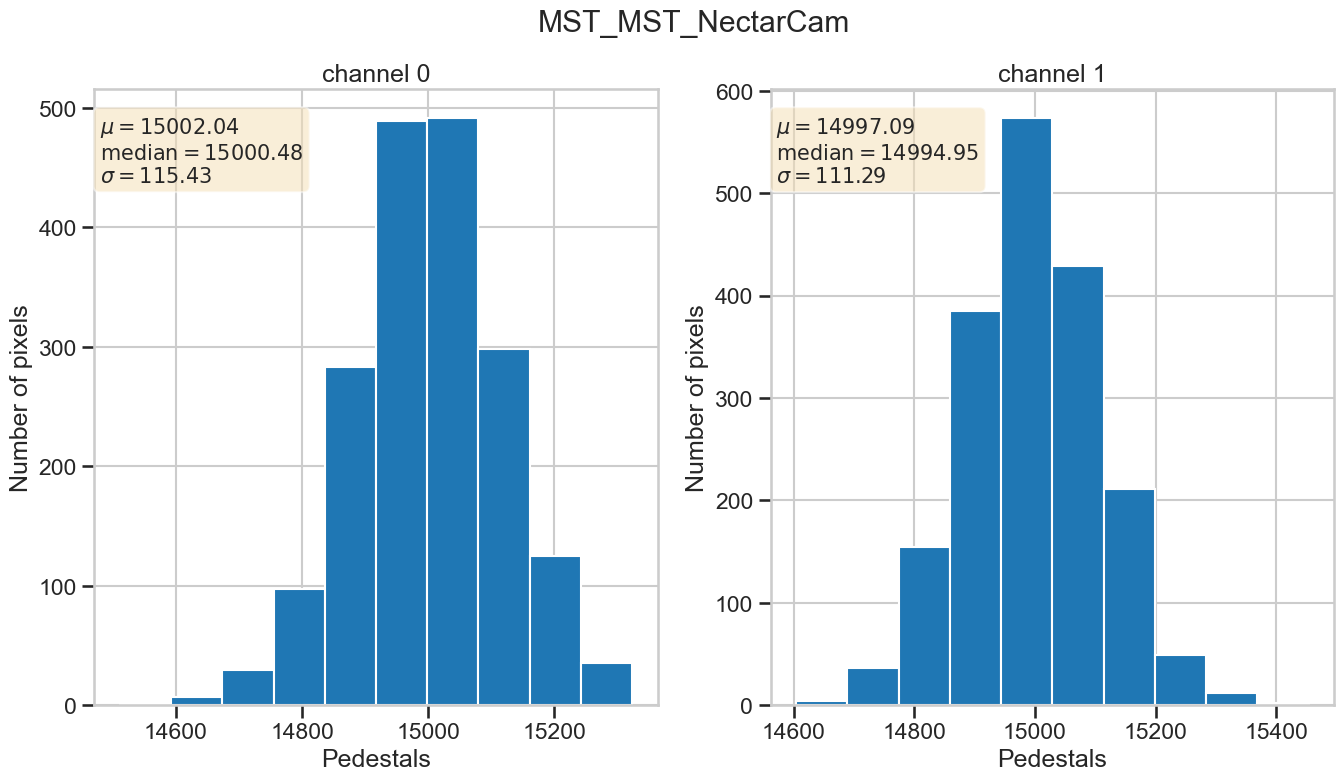

15999.765
16000.373


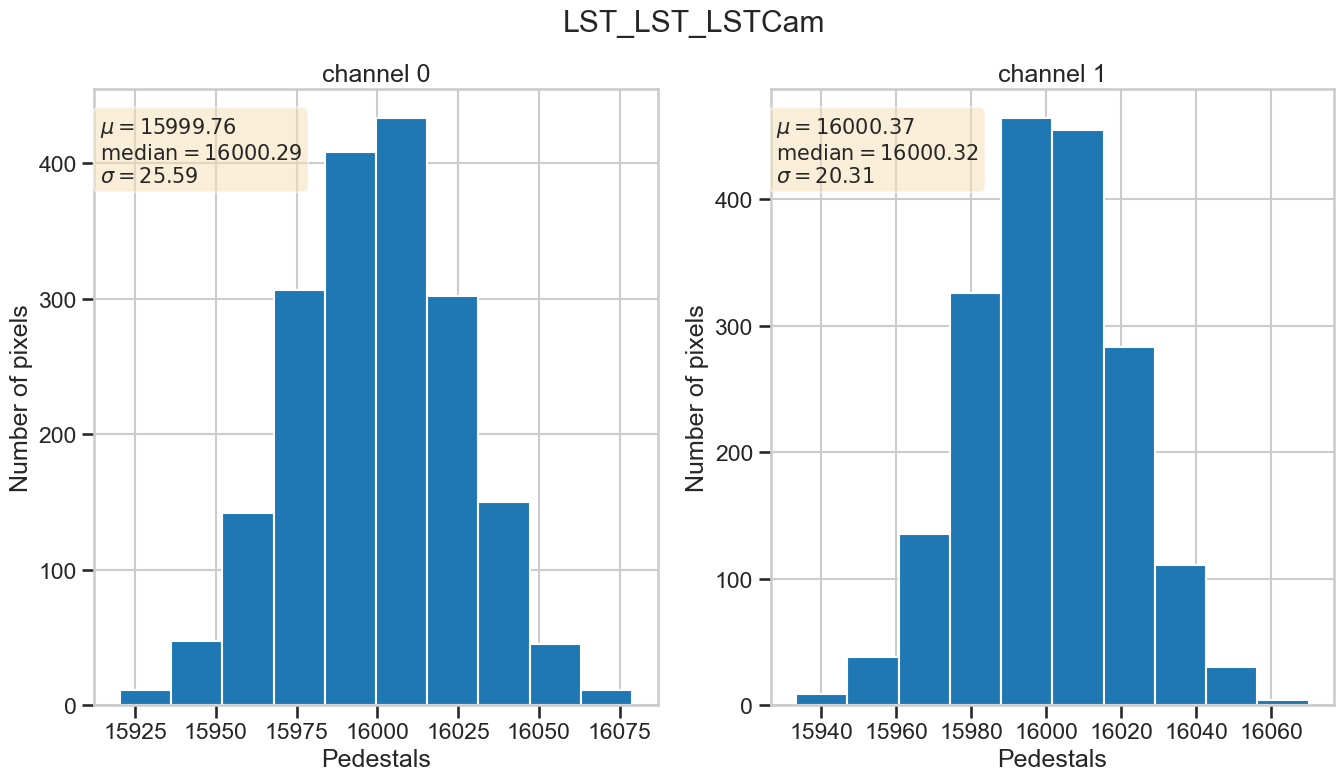

In [68]:
for tel_type in tel_types:
    
    plt.figure(figsize = (double_plot_width, double_plot_height))
    plt.suptitle(tel_type)
    
    tel_id = tel_ids_per_tel_type[tel_type][0] # consider only the first telescope

    pedestals = source.file_.camera_monitorings[tel_id]['pedestal']
    
    for channel, pedestals_per_channel in enumerate(pedestals):
        print(pedestals_per_channel.mean())
        plt.subplot(1,2,channel+1)
        plt.hist(pedestals_per_channel)
        plt.title(f"channel {channel}")
        plt.xlabel("Pedestals")
        plt.ylabel("Number of pixels")
        plt.grid(visible=True)
        add_stats(pedestals_per_channel, plt.gca(), x=0.01, y=0.90, fontsize=15)
    
    plt.show()

## Noise
[back to top](#Table-of-contents)

In [31]:
for tel_type in tel_types:
    
    tel_id = tel_ids_per_tel_type[tel_type][0] # consider only the first telescope
    noise = source.file_.camera_monitorings[tel_id]['noise']

    if np.all(noise[0] == noise[0][0]) and np.all(noise[1] == noise[1][0]):
        for channel, noise_per_channel in enumerate(noise):
            print(f"Telescope type: {tel_type}, Channel {channel}, Noise: {noise_per_channel[0]} phe")
    else:
        plt.figure(figsize = (double_plot_width, double_plot_height))
        plt.suptitle(tel_type)
        for channel, noise_per_channel in enumerate(noise):
            plt.subplot(1,2,channel+1)
            plt.hist(noise_per_channel, bins=100)
            plt.title(f"channel {channel}")
            plt.xlabel("Noise")
            plt.ylabel("Number of pixels")
            plt.grid(visible=True)
        plt.show()

Telescope type: MST_MST_NectarCam, Channel 0, Noise: 3.5999999046325684 phe
Telescope type: MST_MST_NectarCam, Channel 1, Noise: 3.5999999046325684 phe
Telescope type: LST_LST_LSTCam, Channel 0, Noise: 6.699999809265137 phe
Telescope type: LST_LST_LSTCam, Channel 1, Noise: 5.699999809265137 phe


## Reference pulse shapes

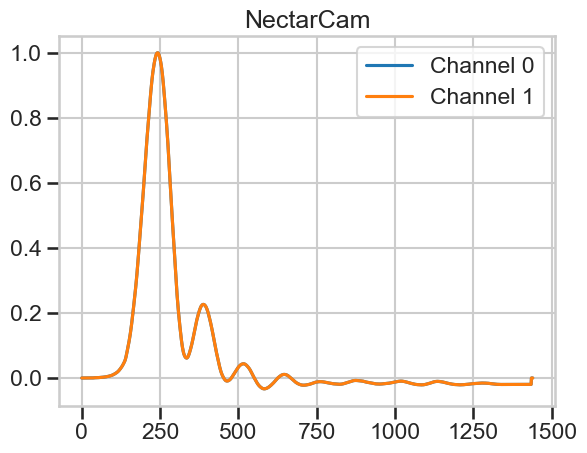

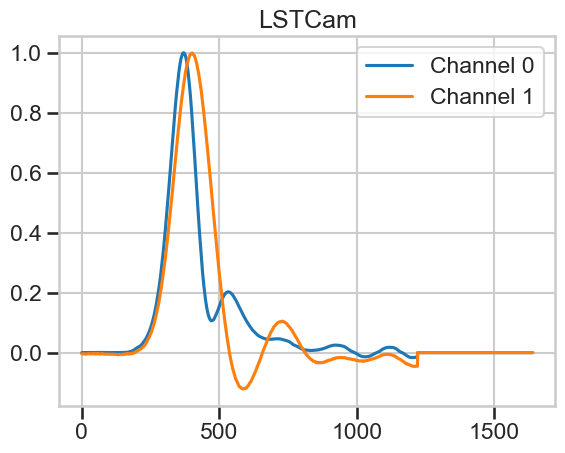

In [32]:
for camera_type in subarray.camera_types:
    
    plt.figure()
    plt.title(camera_type.camera_name)
    
    reference_pulse_shapes = camera_type.readout.reference_pulse_shape
    
    for channel, reference_pulse_shape in enumerate(reference_pulse_shapes):
        
        plt.plot(np.arange(0,len(reference_pulse_shape)), reference_pulse_shape, label=f"Channel {channel}")
        plt.legend()
plt.show()

## Tests

In [51]:
r0_table

obs_id,event_id,tel_id,"waveform [2,1855,60]"
int32,int64,int16,uint16
100,4201,5,242 .. 245
100,4205,5,241 .. 252
100,27806,5,269 .. 253
100,34009,5,253 .. 253
100,41308,5,265 .. 254
100,45107,5,244 .. 252
100,45108,5,242 .. 247
100,58309,5,239 .. 244
100,72601,5,278 .. 245


In [65]:
r0_table["waveform"].shape

(375, 2, 1855, 60)

In [60]:
for tel_type in tel_types:
    
    tel_id = tel_ids_per_tel_type[tel_type][0] # consider only the first telescope
    
    for channel in range(r0_table["waveform"].shape[1]):
        
        R0 = r0_table["waveform"][:][channel]
        
        print(R0.shape)
        print(pedestals.shape)
        print(dc_to_pe.shape)
        
        pedestals = source.file_.camera_monitorings[tel_id]['pedestal'][channel]
        dc_to_pe = source.file_.laser_calibrations[tel_id]["calib"][channel]
        
        R1 = (R0 - pedestals) * dc_to_pe

(2, 1855, 60)
(1855,)
(1855,)


ValueError: operands could not be broadcast together with shapes (2,1855,60) (1855,) 

(2, 1855)

In [38]:
r0["waveform"].shape

(853, 2, 1855, 40)

In [ ]:
pedestals = source.file_.camera_monitorings[tel_id]['pedestal']

plt.plot((r0["waveform"][index]-pedestal)*pe2dc[ichan], label=f"R0 ch{ichan}")

In [35]:
r0["waveform"].shape

(853, 2, 1855, 40)